epoch 0
h(Mx0) = 0
h(Mx1) = 9.030000000000001
h(Mx2) = 70.30165
h(Mx3) = -3.023508249999993
epoch 1
h(Mx0) = 16.268965661249997
h(Mx1) = 33.621032749743755
h(Mx2) = 47.64498515026402
h(Mx3) = 33.28729755258245
epoch 2
h(Mx0) = 13.917741392817096
h(Mx1) = 30.094958167391137
h(Mx2) = 50.90696981268263
h(Mx3) = 28.017741076887823
epoch 3
h(Mx0) = 14.264158156079693
h(Mx1) = 30.643276760660957
h(Mx2) = 50.413547969128494
h(Mx3) = 28.77230237942348
epoch 4
h(Mx0) = 14.219530137828812
h(Mx1) = 30.601821004668405
h(Mx2) = 50.46412795368581
h(Mx3) = 28.65370181572886
epoch 5
h(Mx0) = 14.23136757931289
h(Mx1) = 30.646343981942973
h(Mx2) = 50.43579227093009
h(Mx3) = 28.661276279526806
epoch 6
h(Mx0) = 14.234830705774343
h(Mx1) = 30.67891168813685
h(Mx2) = 50.41880619062157
h(Mx3) = 28.6502428001852
epoch 7
h(Mx0) = 14.239312903679982
h(Mx1) = 30.71368756436302
h(Mx2) = 50.40010374320887
h(Mx3) = 28.641587024276117
epoch 8
h(Mx0) = 14.243452228561248
h(Mx1) = 30.748593523744788
h(Mx2) = 50.381590

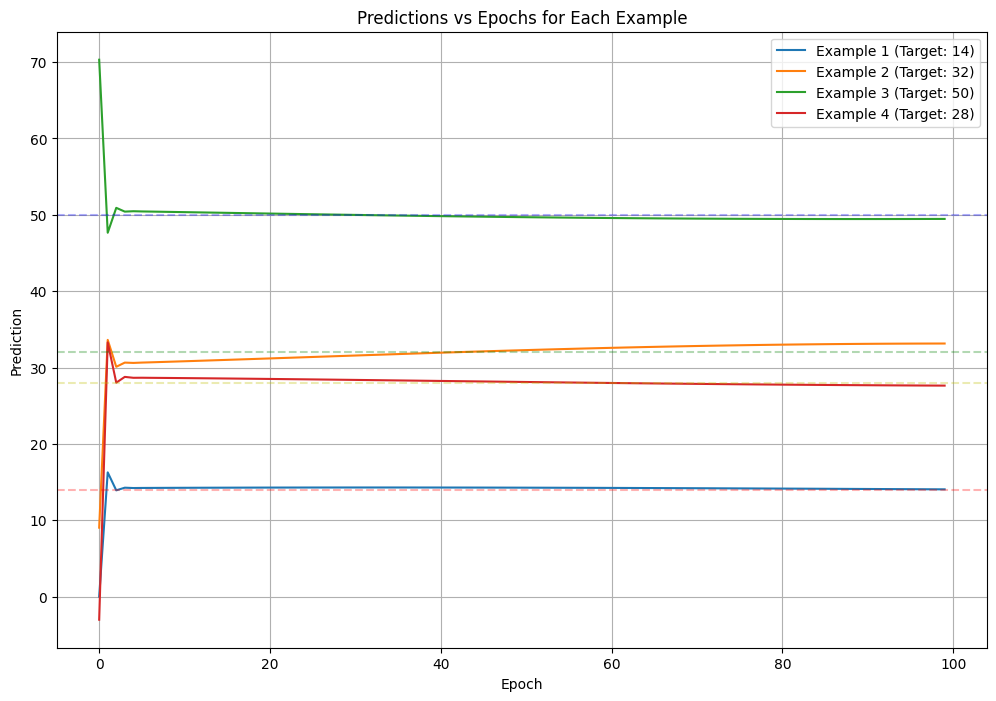


Final Results:
Example | Prediction | Actual | Error
----------------------------------------
      1 |     14.05 |     14 |  0.05
      2 |     33.14 |     32 |  1.14
      3 |     49.46 |     50 |  0.54
      4 |     27.63 |     28 |  0.37


In [5]:
import numpy as np

X = [
    [1, 2, 3],  # Example 1
    [4, 5, 6],  # Example 2
    [7, 8, 9],  # Example 3
    [2, 4, 6]   # Example 4
]
y = [14, 32, 50, 28]  # Target values

# Initial parameters
theta = [0, 0, 0, 0]  # [theta_0, theta_1, theta_2, theta_3]
alpha = .02          # Learning rate
epochs = 100         # Number of iterations


M = len(X)
N = len(X[0])
predictions_history = np.zeros((M, epochs))
# get hypothesis
def hypothesis(x, theta):
    return theta[0] + sum(theta[i + 1] * x[i] for i in range(len(x)))

for epoch in range(epochs):
    print(f"epoch {epoch}")
    errors = []
    predictions = []

    for i in range(M):
        h = hypothesis(X[i], theta)
        print(f"h(Mx{i}) = {h}")
        predictions.append(h)
        errors.append(h - y[i])
        predictions_history[i][epoch] = h
        
        theta[0] = theta[0] - alpha * 1 / M * sum(errors)
        for j in range(N):
            theta[j + 1] = theta[j + 1] - alpha * (predictions[i] - y[i])* X[i][j]
    # update theta
    


# After all epochs complete, plot the results
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 8))

# Plot predictions for each example
for i in range(M):
    plt.plot(range(epochs), predictions_history[i], label=f'Example {i+1} (Target: {y[i]})')

plt.axhline(y=y[0], color='r', linestyle='--', alpha=0.3)
plt.axhline(y=y[1], color='g', linestyle='--', alpha=0.3)
plt.axhline(y=y[2], color='b', linestyle='--', alpha=0.3)
plt.axhline(y=y[3], color='y', linestyle='--', alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Prediction')
plt.title('Predictions vs Epochs for Each Example')
plt.legend()
plt.grid(True)
plt.show()

# Print final predictions vs actual values
print("\nFinal Results:")
print("Example | Prediction | Actual | Error")
print("-" * 40)
for i in range(M):
    final_pred = predictions_history[i][-1]
    print(f"{i+1:7d} | {final_pred:9.2f} | {y[i]:6d} | {abs(final_pred - y[i]):5.2f}")


